In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from itertools import chain

from dwave_qbsolv import QBSolv
from utils import *

In [2]:
G = nx.karate_club_graph()

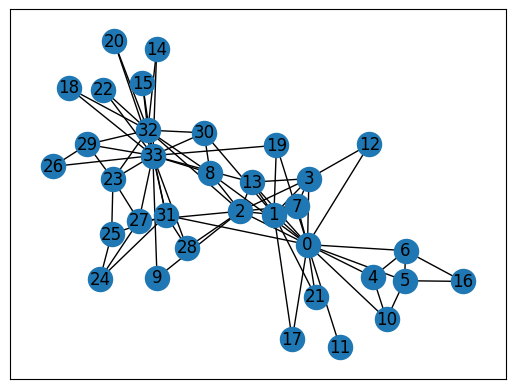

In [3]:
nx.draw_networkx(G)

In [138]:
mod = np.asarray(nx.modularity_matrix(G))
mod.shape

(34, 34)

In [140]:
nx.modularity_matrix?

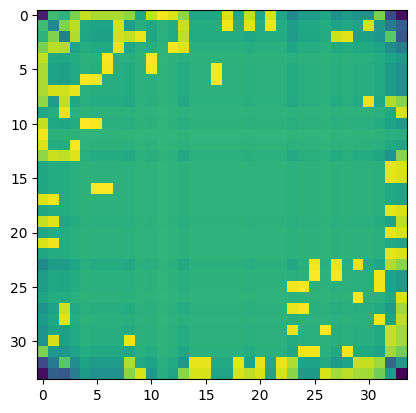

In [139]:
plt.imshow(mod)

In [141]:
def modularity_mat(G):
    adj = nx.adjacency_matrix(G).toarray()
    node_deg = np.array(adj.sum(axis=1))

    mod_mat = adj - np.outer(node_deg, node_deg) / (2*node_deg.sum())
    return mod_mat

def compute_qubo_from_obj_constraints(obj, constraints, alpha=1):
    """
    alpha is the lagrange multiplier
    """
    qubo = obj + alpha * (constraints.T * constraints)
    return qubo

In [142]:
mod = -modularity_mat(G)

k = 3
alpha = 5
M = sp.block_diag(k*[mod])
M.shape

/tmp/ipykernel_41143/2794285456.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).toarray()


(102, 102)

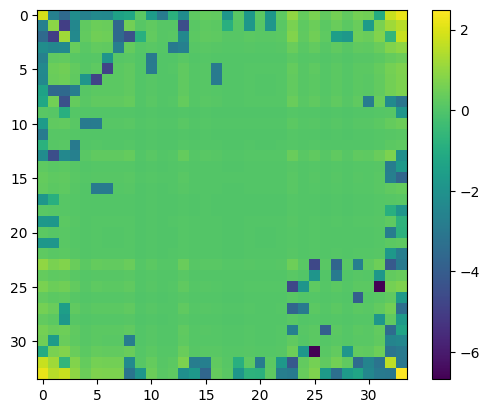

In [143]:
plt.imshow(mod) #.toarray())
plt.colorbar()

In [121]:
# constraints - define the rows and columns that get 1's in a sparse array
num_vars = mod.shape[0]
rows = chain(*[k * [i] for i in range(num_vars)])
cols = chain(*[[j * num_vars + i for j in range(k)] for i in range(num_vars)])
# we need to assign k*n 1's
vals = np.ones((k*num_vars), dtype=np.int8)
constraints = sp.csr_matrix((vals, (list(rows), list(cols))),
                             shape=(num_vars, k*num_vars),
                             dtype="int8")
constraints.shape

(34, 102)

In [122]:
qubo = compute_qubo_from_obj_constraints(M, constraints)

In [123]:
qbs = QBSolv()

/tmp/ipykernel_41143/3150238305.py:1: DeprecationWarning: QBSolv is deprecated as of the end of 2021 and support will be discontinued after March 2022. Please update your code to use dwave-hybrid or Leap's quantum-classical hybrid solvers instead.
  qbs = QBSolv()


In [145]:
# Q = array2dict(qubo.toarray())
Q = mod

soln = qbs.sample_qubo(Q, num_repeats=50)

In [146]:
soln.record['sample']

array([[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]], dtype=int8)

In [147]:
compute_energy(mod, soln.record['sample'][0].T)

matrix([[-22.77564103]])

In [132]:
mod

array([[ 3.81818182, -1.36363636, -2.        , ..., -0.09090909,
         3.45454545,  4.36363636],
       [-1.36363636,  1.82034632, -3.92857143, ...,  1.31818182,
         2.38528139,  3.01298701],
       [-2.        , -3.92857143,  2.35714286, ...,  1.5       ,
         0.71428571,  3.42857143],
       ...,
       [-0.09090909,  1.31818182,  1.5       , ...,  0.95454545,
        -2.27272727, -1.81818182],
       [ 3.45454545,  2.38528139,  0.71428571, ..., -2.27272727,
         3.12554113, -1.05194805],
       [ 4.36363636,  3.01298701,  3.42857143, ..., -1.81818182,
        -1.05194805,  4.98701299]])